# A Very basic introduction to TensorFlow

**TensorFlow** is a new open source **Machine Learning** library from Google. It was released in novenber 2015 and is now one of the most popular library with 10k+ stars on github. It is used in various commercial products within google. It is successor to the **DistBelief** system craeted by the Google Brain team. It is released under Apache 2.0 open source license.

<img src="images/tensorflow.png"/>

**TensorFlow** works on the concept of **Computational Graph**. Computational Graph consists of **nodes** and **edges** and the data that flows in the graph is called a **Tensor**. Tensor is an n-dimensional array. Tensor flows through the directed edges towards nodes. Each node in the graph is an **operation node** also known as **op** for short. Each node manipulates the tensor hence known as operation node. Many Op nodes are provided by tensorflow such as **matmul( )**, **add( )**, **reshape( )** etc. Tensorflow API is available in Python and C++.

<img src="images/TensorFlow-graph1.jpg"/>

In [ ]:
# to start with tensorflow, import tensorflow
# numpy needed for structing data in a suitable format for tensorflow
import tensorflow as tf
import numpy as np

In tensorflow every thing is an Op, from variable to matmul. Tensorflow creates a default graph. Every Op defined gets appended to this default graph.
For a very basic problem in tensorflow, we will be doing matrix multiplication.

In [ ]:
#define constants
#since we are not sending data on the execution of the graph
# no object is initailized until the tf.Session() is run
x = tf.constant(np.array([[1,5,2,7],[6,8,9,2]]),dtype='float64')
y = tf.constant(np.array([[2,3],[6,3],[7,0],[4,1]]),dtype='float64')

In [ ]:
#defining predefined matrix multiplication Op
output = tf.matmul(x,y)

**tf.Session** object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated. Tensorflow graph always run inside a Session.
But we will use **tf.InteractiveSession( )**

In [ ]:
#TInteractiveSession is for IPython notebooks, as it avoids having to pass an explicit Session object to run ops.
sess = tf.InteractiveSession()
#sess has started with the default graph

In [ ]:
# we use eval() or sess.run(output) with InteractiveSession
print(output.eval())

In [ ]:
# close the session to free the resources
sess.close()

With non interactive environments we use **tf.Session( )** and instead of eval( ) we use **sess.run( )**.

Now going for a little more advance example, we will b using placeholder to input data during session.

In [ ]:
# tf.float64 is tensorflow type to specify what type of data placeholder(X) will be expecting
# shape is optional, determines what placeholder is expecting in terms of size of data
x = tf.placeholder(tf.float64,shape=(5,5))
y = tf.placeholder(tf.float64,shape=(5,5))
bt = tf.ones_like(x,tf.float64)

output = tf.add(tf.matmul(x,bt),y)

In [ ]:
# getting some values ready for placeholders
x_input = np.random.normal(0,0.5,(5,5))
y_input = np.random.normal(1,0.7,(5,5))

In [ ]:
# starting the session
sess = tf.InteractiveSession()

In [ ]:
# we input x_input and y_input to the x and y placeholders
sess.run(output,feed_dict={x:x_input,y:y_input})

## Linear Regression in tensorflow

In [1]:
%matplotlib inline
from IPython.display import display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-1,1,100)
Y = 2 * X + np.random.randn(*X.shape) * 0.33
display(X)
display(Y)

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

array([-1.98283291, -2.34280709, -2.13734643, -1.68201045, -1.52761846,
       -1.40931645, -1.08917933, -1.43476338, -1.66901485, -1.36522149,
       -1.47919862, -1.52080687, -0.95401396, -1.23404546, -1.30229656,
       -1.26946671, -1.25193982, -1.69460565, -0.94354323, -1.67150279,
       -1.55355568, -0.83223334, -0.83377849, -1.08485916, -1.34389124,
       -1.02664341, -0.82888355, -0.44648213, -1.01389984, -0.47205636,
       -1.10857134, -0.6829977 , -0.73380919, -0.69202898, -0.59548772,
       -0.15451463, -0.39997597, -0.35410912, -0.39103993, -0.33003199,
       -0.17852761, -0.86474763, -0.66497953, -0.79209156, -0.53018976,
        0.20185977, -0.03179097,  0.32829657, -0.02574404,  0.09092627,
       -0.3723522 ,  0.49940792,  0.40817661,  0.36332247, -0.17229884,
        0.28121086,  0.15033128, -0.04282678,  0.36946754,  0.47807451,
        0.36509045,  0.48135715,  0.74877889,  0.26041079,  0.48056938,
        0.55442647,  0.59605971,  0.61320531,  0.68265149,  0.08

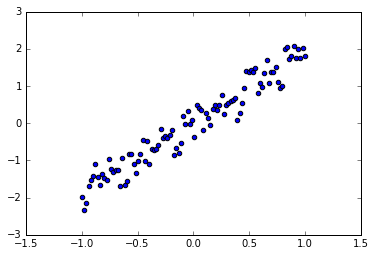

In [3]:
plt.scatter(X,Y)

In [4]:
X_input = tf.placeholder('float')
Y_input = tf.placeholder('float')
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [5]:
WX = tf.mul(W,X_input) + b

In [6]:
cost = tf.square(Y_input - WX)

In [7]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [8]:
sess = tf.InteractiveSession()

In [9]:
tf.initialize_all_variables().run()

In [10]:
for i in range(100):
    for (x,y) in zip(X,Y):
        sess.run(train, feed_dict={X_input:x, Y_input:y})

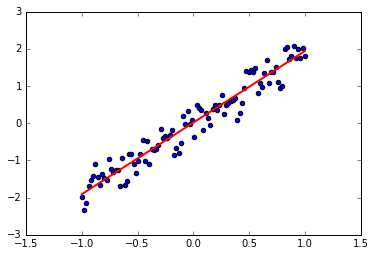

In [23]:
plt.scatter(X,Y)
#W = W.eval()
#b = b.eval()
plt.plot(X,X*W+b,'r',linewidth=2)

In [27]:
#print('training cost',cost.eval())
print('W',W)
print('b',b)

W 1.92525
b 0.0159235


In [28]:
sess.close()